In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os

In [2]:
splits = ['qm9_random', 'qm9_old_random', 'qm9_old_scaffold', 'qm9_scaffold']
architectures = ['E64_H4', 'E96_H4', 'E96_H8', 'E128_H8']
stacks = ['L8', 'C8', 'LC4', 'M8']

## By split

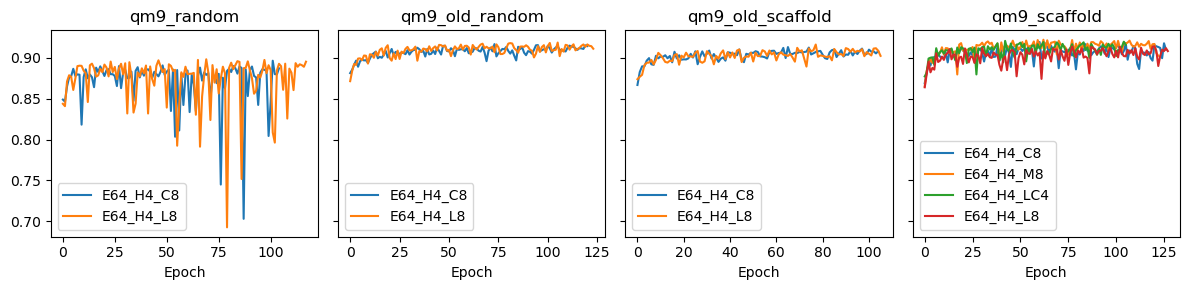

In [3]:
fig, axs = plt.subplots(1, len(splits), figsize=(len(splits) * 3, 3), sharey=True)
if type(axs) is not np.ndarray: axs = [axs]

for ax, split in zip(axs, splits):
    for fname in os.listdir(f'./{split}'):
        if not fname.endswith('csv'): continue
        log = pd.read_csv(f'./{split}/{fname}')
        ax.plot(log['validation_r2'], label=fname[:-4])
        #ax.set_ylim(0, 1)

    ax.set_title(split)
    ax.set_xlabel('Epoch')
    ax.legend()

plt.tight_layout()

## Graph Operators

In [3]:
log_files = {
    'GIN': '../../gin/logs/E64H4D8.csv', 
    'GATv2': '../../gat/logs/E64H4D8.csv', 
    'SDPA': './qm9_scaffold/E64H4/8L.csv'
}

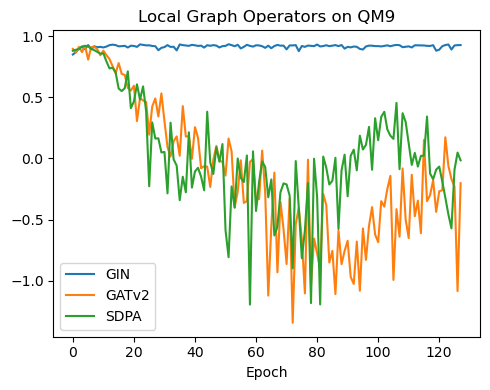

In [4]:
fig, ax = plt.subplots(figsize=(5, 4))

for label, file in log_files.items():
    ax.plot(pd.read_csv(file)['validation_r2'], label=label)

ax.set_title('Local Graph Operators on QM9')
ax.set_xlabel('Epoch')
ax.legend()

plt.tight_layout()

## By architecture

/home/jshe/ipykernel_714943/3599287940.py:18: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


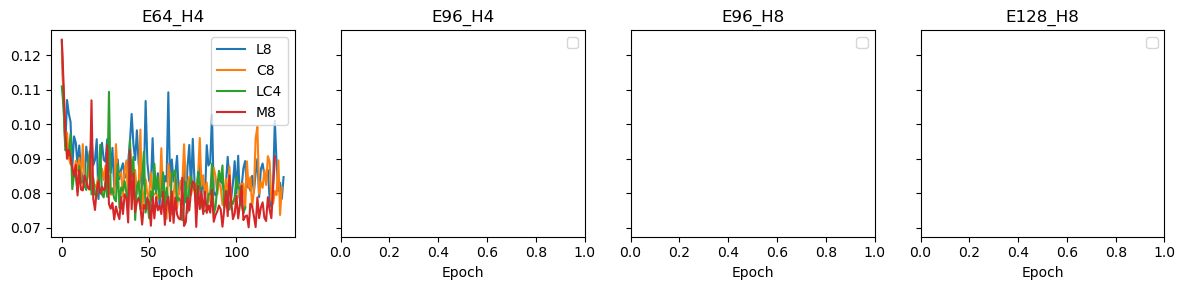

In [5]:
fig, axs = plt.subplots(1, len(architectures), figsize=(len(architectures) * 3, 3), sharey=True)
if type(axs) is not np.ndarray: axs = [axs]

for ax, architecture in zip(axs, architectures):
    max_score = 0
    for stack in stacks:
        try:
            log = pd.read_csv(
                f'./qm9_scaffold/{architecture}_{stack}.csv'
            )
        except:
            continue
        ax.plot(log['validation_mse'], label=stack)
        #ax.set_ylim(0, 1)

    ax.set_title(architecture)
    ax.set_xlabel('Epoch')
    ax.legend()

plt.tight_layout()

## By stack

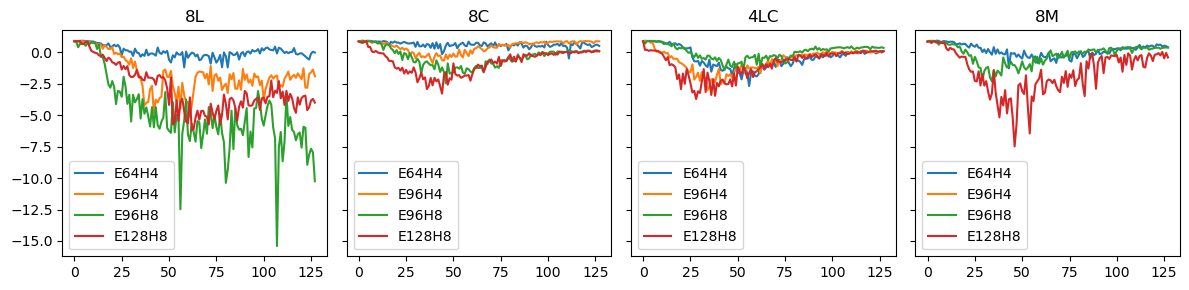

In [14]:
fig, axs = plt.subplots(1, len(stacks), figsize=(len(stacks) * 3, 3), sharey=True)
if len(axs) == 1: axs == axs[axs]

for ax, stack in zip(axs, stacks):
    max_score = 0
    for architecture in architectures:
        log = pd.read_csv(
            f'./{dataset}/{architecture}/{stack}.csv'
        )
        ax.plot(log['validation_r2'], label=architecture)

    ax.set_title(stack)
    ax.legend()

plt.tight_layout()

## By split

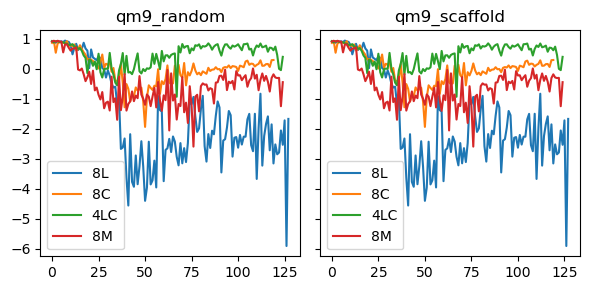

In [46]:
fig, axs = plt.subplots(1, len(splits), figsize=(len(splits) * 3, 3), sharey=True)
if len(axs) == 1: axs == axs[axs]

for ax, split in zip(axs, splits):
    max_score = 0
    for stack in stacks:
        log = pd.read_csv(
            f'./{dataset}/E96H8/{stack}.csv'
        )
        ax.plot(log['validation_r2'], label=stack)

    ax.set_title(split)
    ax.legend()

plt.tight_layout()